<a href="https://colab.research.google.com/github/ayyucedemirbas/earthquakes/blob/main/earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
from datetime import datetime

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"


params = {
    "format": "geojson",
    "starttime": "1991-01-01",
    "endtime": datetime.now().strftime("%Y-%m-%d"),
    "minlatitude": 36,
    "maxlatitude": 42,
    "minlongitude": 26,
    "maxlongitude": 45,
}
response = requests.get(url, params=params)

data = response.json()
features = data["features"]

earthquakes = []

for feature in features:
    time = datetime.fromtimestamp(feature["properties"]["time"] / 1000)
    magnitude = feature["properties"]["mag"]
    place = feature["properties"]["place"]
    latitude = feature["geometry"]["coordinates"][1]
    longitude = feature["geometry"]["coordinates"][0]
    depth = feature["geometry"]["coordinates"][2]
    earthquakes.append([time, magnitude, place, latitude, longitude, depth])


df = pd.DataFrame(earthquakes, columns=["Time", "Magnitude", "Place", "Latitude", "Longitude", "Depth"])

df.to_csv("earthquakes.csv", index=False)


In [2]:
df = pd.DataFrame(earthquakes, columns=["Time", "Magnitude", "Place", "Latitude", "Longitude", "Depth"])
df1 = df[df["Magnitude"] > 6]


In [3]:
df1

,Time,Magnitude,Place,Latitude,Longitude,Depth
6,2025-08-10 16:53:47.318,6.1,"10 km SSW of Bigadiç, Turkey",39.3121,28.0694,10.000
37,2025-04-23 09:49:11.631,6.2,"24 km SE of Marmara Ereğlisi, Turkey",40.8342,28.1897,12.736
422,2023-02-20 17:04:29.747,6.3,"2 km NNW of Uzunba?, Turkey",36.1616,36.0251,16.000
743,2023-02-06 10:24:48.811,7.5,"Elbistan earthquake, Kahramanmaras earthquake ...",38.0106,37.1962,7.432
840,2023-02-06 01:28:15.784,6.7,"14 km E of Nurda??, Turkey",37.1893,36.8929,9.797
842,2023-02-06 01:17:34.342,7.8,"Pazarcik earthquake, Kahramanmaras earthquake ...",37.2256,37.0143,10.000
876,2022-11-23 01:08:15.435,6.1,"15 km W of Düzce, Turkey",40.8356,30.9831,10.000
1154,2020-10-30 11:51:27.348,7.0,"13 km NNE of Néon Karlovásion, Greece",37.8973,26.7838,21.000
1289,2020-01-24 17:55:14.147,6.7,"13 km N of Do?anyol, Turkey",38.4312,39.0609,10.000
1512,2017-07-20 22:31:11.260,6.6,"11 km ENE of Kos, Greece",36.9293,27.4139,7.000


In [4]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("earthquakes.csv")

m = folium.Map(location=[39, 35], zoom_start=5)
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m.save("earthquake_heatmap.html")


In [5]:
import matplotlib.pyplot as plt

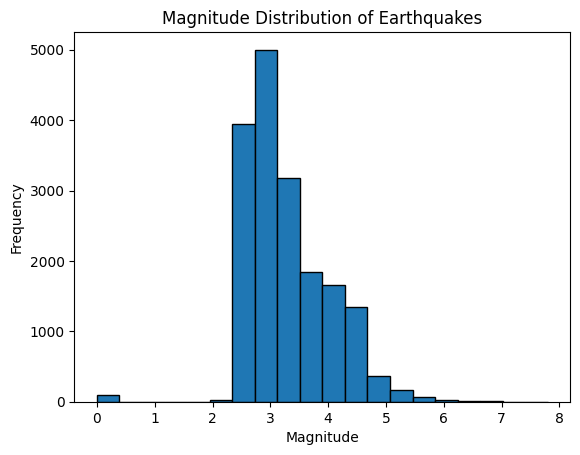

In [6]:
plt.hist(df["Magnitude"], bins=20, edgecolor='black')
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution of Earthquakes")
plt.show()

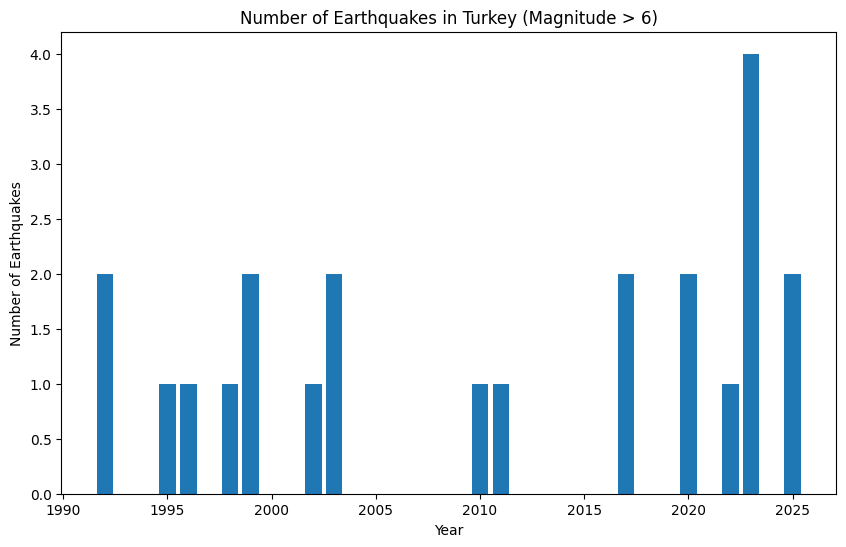

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year

df = df[df['Magnitude'] > 6]

counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes in Turkey (Magnitude > 6)')
plt.show()

/tmp/ipython-input-2125695164.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_counts = df.resample('Y').size()


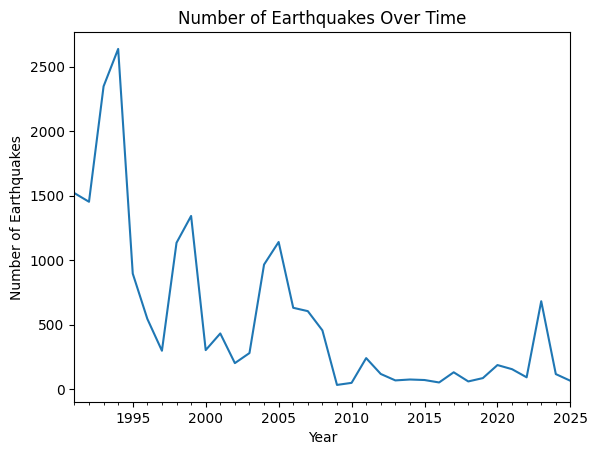

In [8]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

yearly_counts = df.resample('Y').size()

yearly_counts.plot()

plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Number of Earthquakes Over Time")


plt.show()


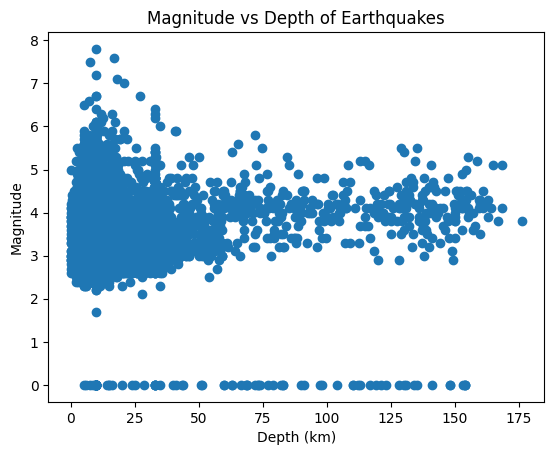

In [9]:
plt.scatter(df["Depth"], df["Magnitude"])

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Depth of Earthquakes")

plt.show()

/tmp/ipython-input-2978493461.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean_depth = df['Depth'].resample('Y').mean()


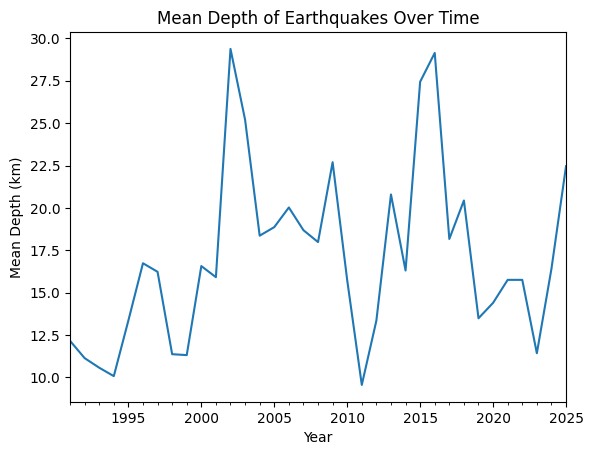

In [10]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
yearly_mean_depth = df['Depth'].resample('Y').mean()

yearly_mean_depth.plot()

plt.xlabel("Year")
plt.ylabel("Mean Depth (km)")
plt.title("Mean Depth of Earthquakes Over Time")

plt.show()


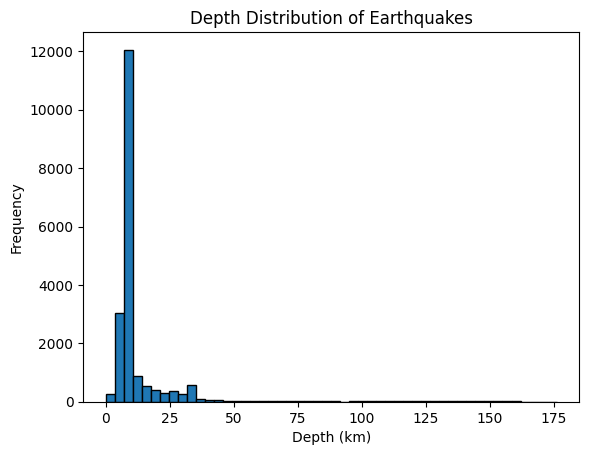

In [11]:
plt.hist(df["Depth"], bins=50, edgecolor='black')

plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.title("Depth Distribution of Earthquakes")

plt.show()

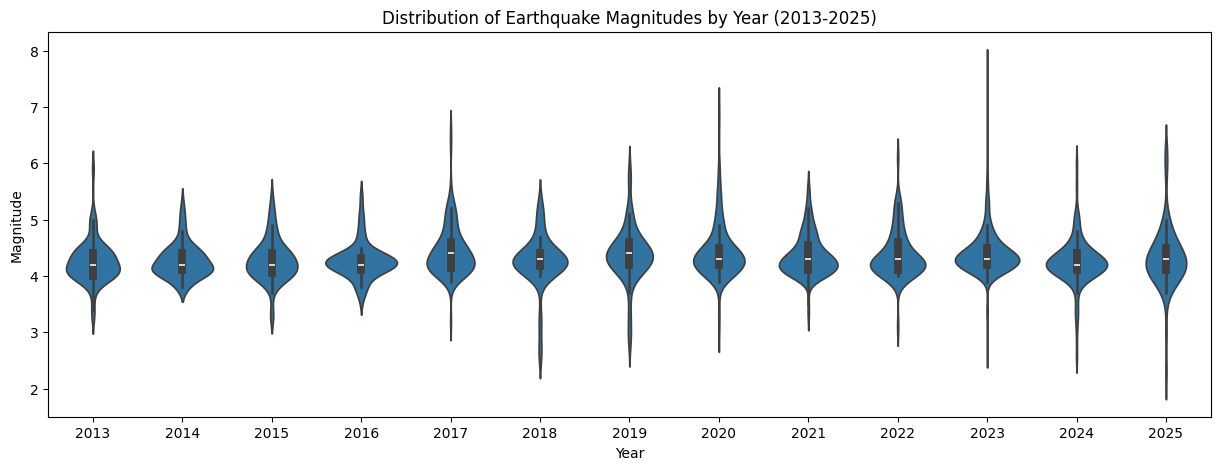

In [12]:
import seaborn as sns

df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])
df['Year'] = df['Time'].dt.year

df = df[(df['Year'] >= 2013) & (df['Year'] <= 2025)]

plt.figure(figsize=(15, 5))
sns.violinplot(x="Year", y="Magnitude", data=df)

plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Distribution of Earthquake Magnitudes by Year (2013-2025)")

plt.show()


/tmp/ipython-input-3004287814.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean_magnitude = df['Magnitude'].resample('Y').mean()


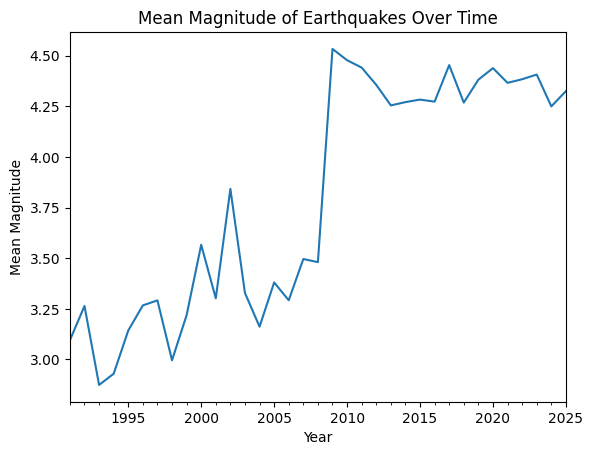

In [13]:
df = pd.read_csv("earthquakes.csv")
df['Time'] = pd.to_datetime(df['Time'])

df.set_index('Time', inplace=True)


yearly_mean_magnitude = df['Magnitude'].resample('Y').mean()

yearly_mean_magnitude.plot()


plt.xlabel("Year")
plt.ylabel("Mean Magnitude")
plt.title("Mean Magnitude of Earthquakes Over Time")


plt.show()


In [14]:
df

,Magnitude,Place,Latitude,Longitude,Depth
Time,,,,,
2025-08-13 17:39:13.140,4.7,"42 km SW of Mandráki, Greece",36.3160,26.8293,133.459
2025-08-12 21:30:26.401,4.2,"17 km SW of Sındırgı, Turkey",39.1351,28.0362,14.969
2025-08-11 17:13:33.468,4.4,"20 km SSW of Sındırgı, Turkey",39.0735,28.0839,10.000
2025-08-11 16:52:05.315,4.0,"11 km W of Sındırgı, Turkey",39.2530,28.0442,13.546
2025-08-11 01:55:10.637,4.1,"0 km NNE of Sındırgı, Turkey",39.2445,28.1807,10.000
...,...,...,...,...,...
1991-01-02 15:48:50.280,2.7,"6 km NE of Yenice, Turkey",39.7950,28.9700,10.000
1991-01-02 14:02:13.580,2.8,"15 km NNW of Manyas, Turkey",40.1770,27.9120,10.000
1991-01-02 09:35:48.660,2.7,"13 km S of Mudanya, Turkey",40.2550,28.8760,10.000


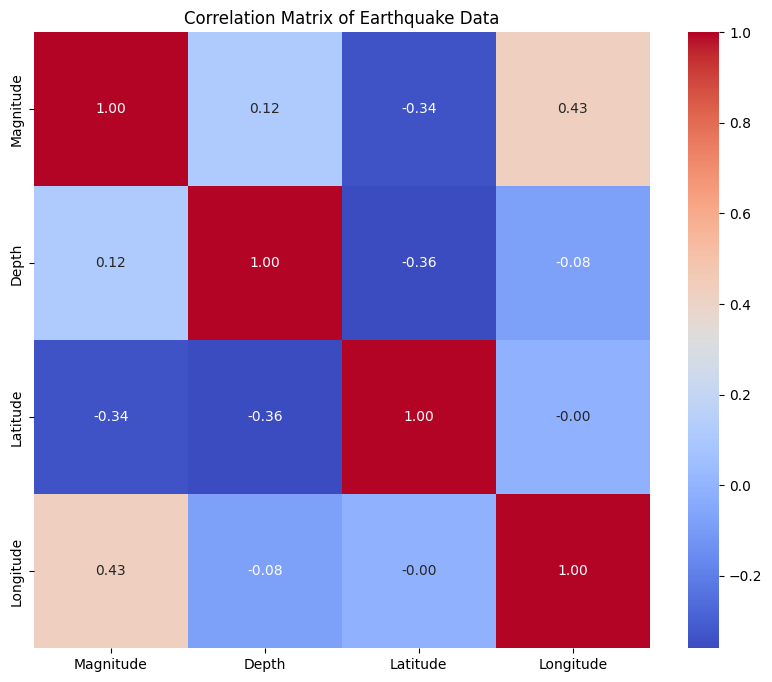

In [15]:
df = pd.read_csv("earthquakes.csv")

df = df[["Magnitude", "Depth",	"Latitude",	"Longitude"]]

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix of Earthquake Data")

plt.show()